In [1]:
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models

In [3]:
features = np.loadtxt('no_scalar_features.txt')
labels = np.loadtxt('no_scalar_labels.txt')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [4]:
model = models.load_model('model.keras')

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20, 60)         │         3,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 20, 50)         │        22,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100)            │        40,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,879 (843.28 KB)

 Trainable params: 71,959 (281.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 143,920 (562.19 KB)

2132/2132 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0003
Mean Absolute Error: 0.0002
R-squared Score: 0.9997


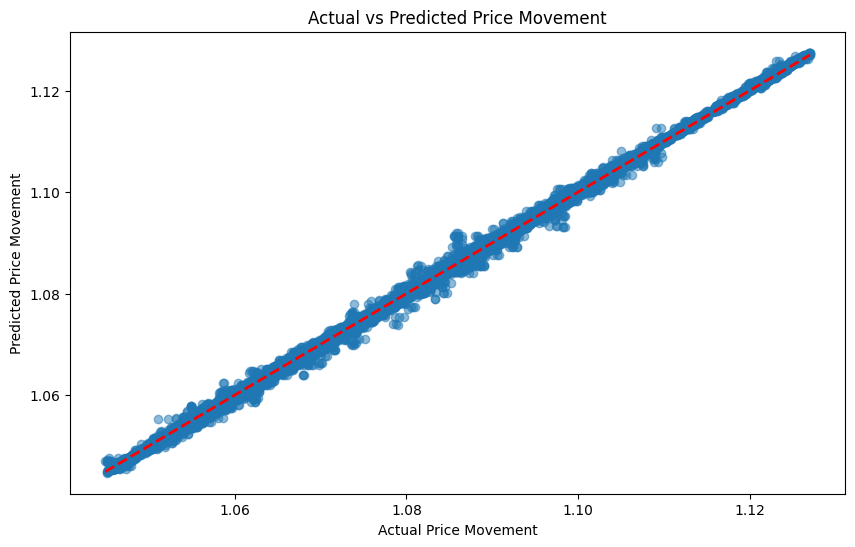

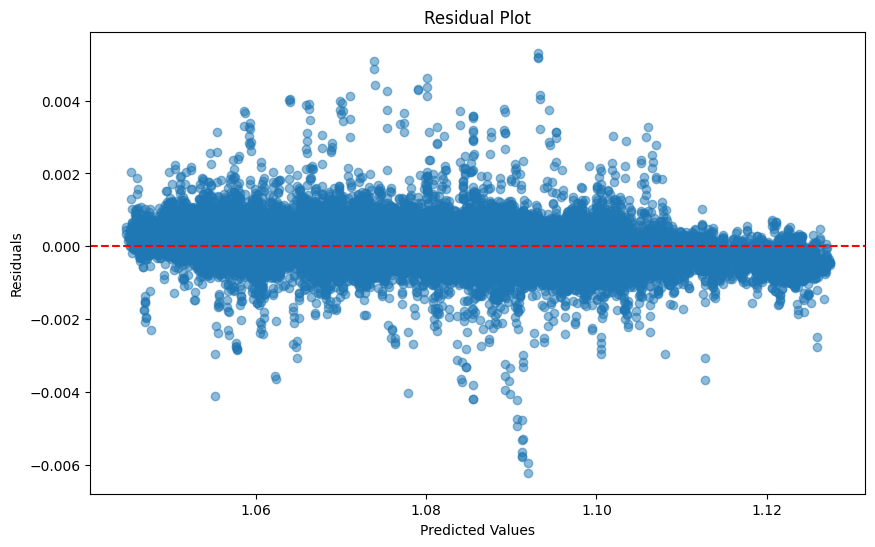

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate basic regression metrics
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price Movement')
plt.ylabel('Predicted Price Movement')
plt.title('Actual vs Predicted Price Movement')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# PREDICTED VS ACTUAL

In [7]:
y_pred = model.predict(np.array(x_test[0:50]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


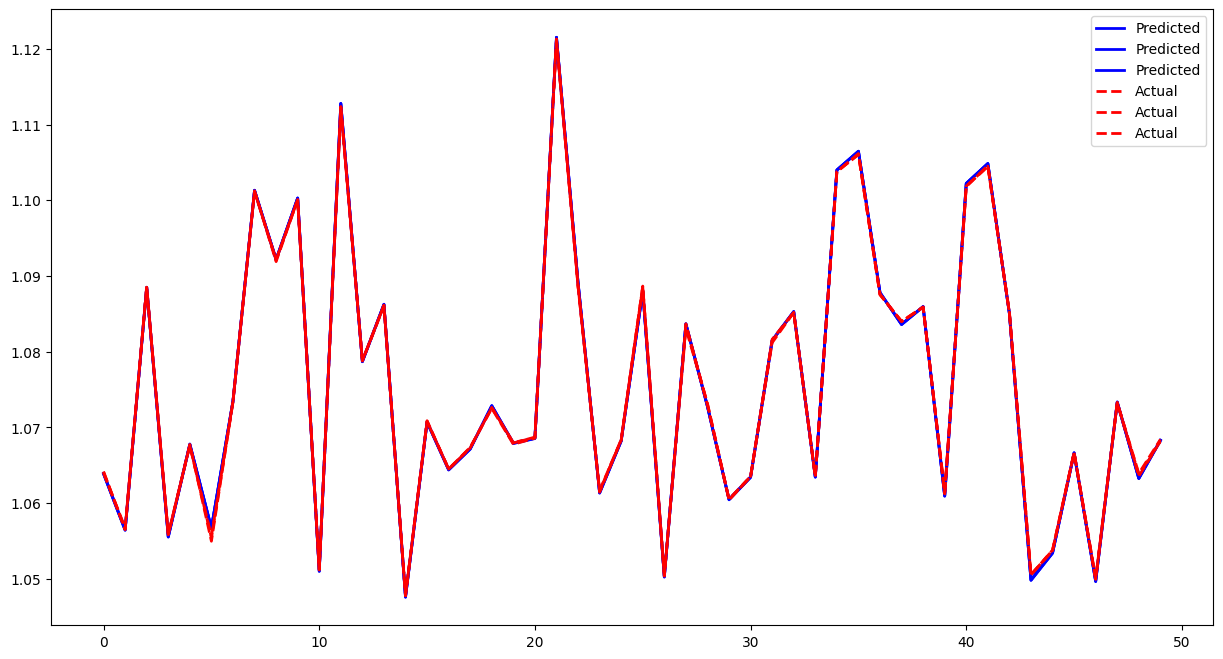

In [8]:
import matplotlib.pyplot as plt
time_index=np.arange(len(y_test[0:50]))
plt.figure(figsize=(15,8))
plt.plot(time_index, y_pred, color='blue', label='Predicted', linewidth=2)
plt.plot(time_index, y_test[0:50], color='red', label='Actual', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [13]:
print(y_pred[0])

[0.41787794 0.41716465 0.41620493]


In [8]:
x_test[0]

array([ 0.43338908,  0.42190692,  0.42733921,  0.42914691,  0.4273301 ,
        0.42430519,  0.42369659,  0.42550436,  0.42006295,  0.42851566,
        0.42788369,  0.4246178 ,  0.41968421,  0.42428258,  0.49333222,
       -0.24857692,  0.42442407,  0.42537463,  0.42303987,  0.4134077 ,
        0.03856801, -0.26449936])

In [9]:
y_test[0]

array([0.42186176, 0.42668995, 0.41641595])